saving image to d:\WP\Zpace\Workspace\Teaching\IE4497\Repository\Lectures\Weeks 1-6\pml-code\notebooks\..\figures\kmeans_voronoi_data.pdf


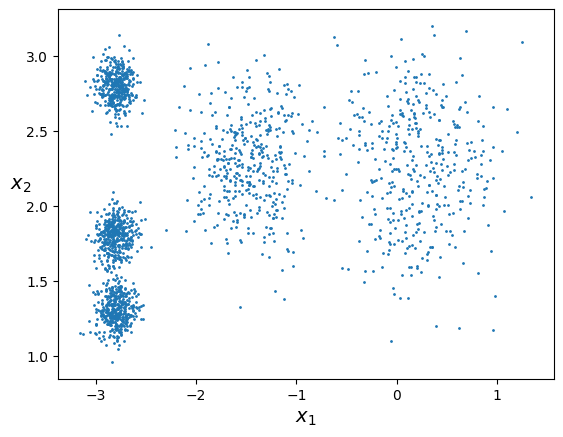

In [1]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import pyprobml_utils as pml

if 1:
    blob_centers = np.array(
        [[ 0.2,  2.3],
         [-1.5 ,  2.3],
         [-2.8,  1.8],
         [-2.8,  2.8],
         [-2.8,  1.3]])
    blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
    X, y = make_blobs(n_samples=2000, centers=blob_centers,
                      cluster_std=blob_std, random_state=7)

if 0:
    # two off-diagonal blobs
    X1, _ = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
    X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
    # three spherical blobs
    blob_centers = np.array(
        [[ -4,  1],
         [-4 ,  3],
         [-4,  -2]])
    s = 0.5
    blob_std = np.array([s, s, s])
    X2, _ = make_blobs(n_samples=1000, centers=blob_centers,
                      cluster_std=blob_std, random_state=7)
    
    X = np.r_[X1, X2]
    K = 5
    
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
plt.figure()
plot_clusters(X)
pml.savefig("kmeans_voronoi_data.pdf")
plt.show()


def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='r', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=5,
                color=circle_color, zorder=10, alpha=0.9)
    # plt.scatter(centroids[:, 0], centroids[:, 1],
    #             marker='x', s=200, linewidths=8,
    #             color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)


saving image to d:\WP\Zpace\Workspace\Teaching\IE4497\Repository\Lectures\Weeks 1-6\pml-code\notebooks\..\figures\kmeans_voronoi_output.pdf


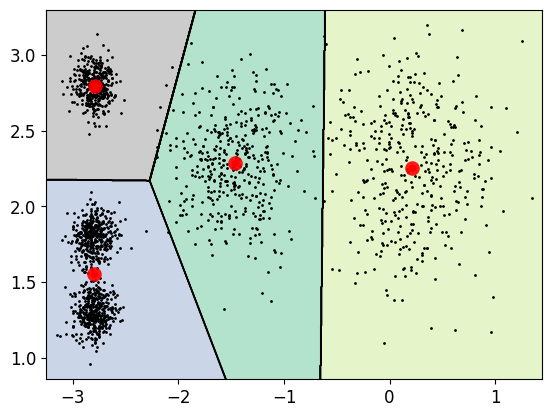

In [2]:
#         
K = 4
kmeans = KMeans(n_clusters=K, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

plt.figure()
plot_decision_boundaries(kmeans, X)
pml.savefig("kmeans_voronoi_output.pdf")
plt.show()


In [3]:
# distance of a set of 4 points to each cluster center
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
d1 = kmeans.transform(X_new)
d2 = np.linalg.norm(np.tile(X_new, (1, K)).reshape(-1, K, 2) - kmeans.cluster_centers_, axis=2)
print(d1)
print(d2)



[[1.49439034 2.83778629 0.32995317 2.9042344 ]
 [4.4759332  5.81943941 2.80290755 5.84739223]
 [1.69136631 1.4618254  3.29399768 0.29040966]
 [1.54808703 0.96879317 3.21806371 0.36159148]]
[[1.49439034 2.83778629 0.32995317 2.9042344 ]
 [4.4759332  5.81943941 2.80290755 5.84739223]
 [1.69136631 1.4618254  3.29399768 0.29040966]
 [1.54808703 0.96879317 3.21806371 0.36159148]]


saving image to d:\WP\Zpace\Workspace\Teaching\IE4497\Repository\Lectures\Weeks 1-6\pml-code\notebooks\..\figures\kmeans_voronoi_iter.pdf


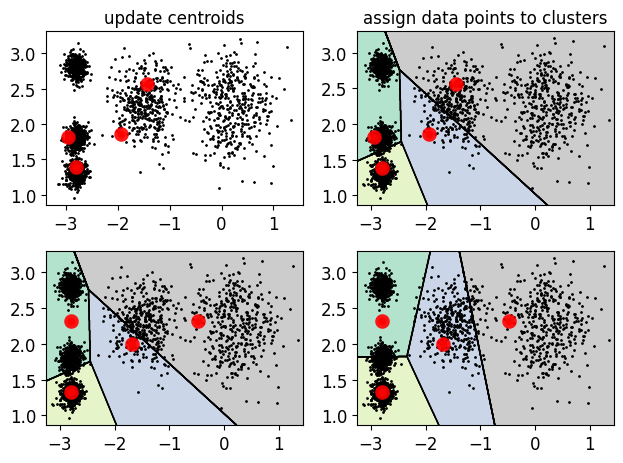

In [4]:
### Plot iterations of K means

seed = 1
kmeans_iter1 = KMeans(n_clusters=K, init="random", n_init=1,
                     algorithm="lloyd", max_iter=1, random_state=seed)
kmeans_iter2 = KMeans(n_clusters=K, init="random", n_init=1,
                     algorithm="lloyd", max_iter=2, random_state=seed)
kmeans_iter3 = KMeans(n_clusters=K, init="random", n_init=1,
                     algorithm="lloyd", max_iter=3, random_state=seed)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)


plt.figure()
nr = 2; nc = 2;

plt.subplot(nr, nc, 1)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.title('update centroids')

plt.subplot(nr, nc, 2)
plot_decision_boundaries(kmeans_iter1, X)
plt.title('assign data points to clusters')

plt.subplot(nr, nc, 3)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(nr, nc, 4)
plot_decision_boundaries(kmeans_iter2, X)

plt.tight_layout()
pml.savefig("kmeans_voronoi_iter.pdf")
plt.show()


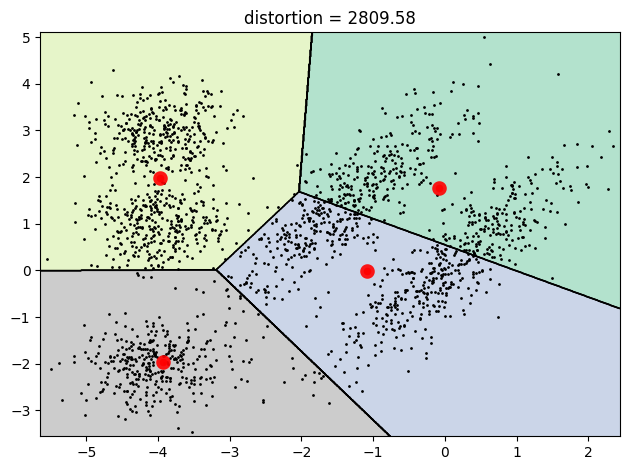

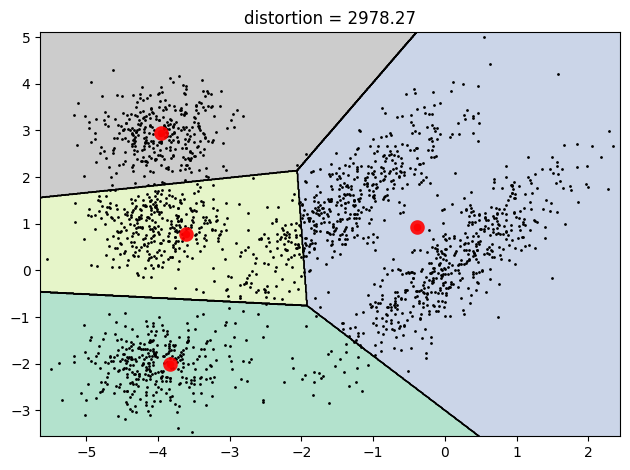

In [13]:
### K means variability    
seeds = [2, 3]
for seed in seeds:
    model = KMeans(n_clusters=K, init="random", n_init=1,
                  algorithm="lloyd", random_state=seed)  
    model.fit(X)
    plt.figure()
    plot_decision_boundaries(model, X)
    loss = model.inertia_
    plt.title('distortion = {:0.2f}'.format(loss, fontsize=14))
    plt.tight_layout()
    pml.savefig("kmeans_voronoi_init_{seed}.pdf")
    plt.show()
